In [ ]:
https://drive.google.com/drive/folders/15uJVsvQherX1OO6THa32uysdfUn2LVCz?usp=drive_link

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from google.colab import drive
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
drive.mount('/content/drive')
import gdown
url = 'https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM'
gdown.download(url)
%cd drive/MyDrive/HCI_Assignment_1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=164sQHZYvxU2XXPokrjzqv9MCGAMHaCIM
To: /content/drive/My Drive/HCI_Assignment_1/commonlit-evaluate-student-summaries.zip
100%|██████████| 1.10M/1.10M [00:00<00:00, 81.2MB/s]

[Errno 2] No such file or directory: 'drive/MyDrive/HCI_Assignment_1'
/content/drive/MyDrive/HCI_Assignment_1


In [ ]:
FL = pd.read_csv('2_FL.csv')
SL = pd.read_csv('2_SL.csv')

In [ ]:
print(FL.head())

   Unnamed: 0  distance  width  movement_time
0        4159       160      8            744
1        4107        40     20            352
2        1503        75     20            503
3        4914        75     10            609
4        5109       210      6           1327


In [ ]:
FL["index_of_difficulty"] = np.log2((FL["distance"] / FL["width"]) + 1)

In [ ]:
id_by_fitts = FL['index_of_difficulty'].values.reshape(-1, 1)
movement_time = FL["movement_time"].values
model = LinearRegression();
model.fit(id_by_fitts, movement_time)
a = model.intercept_
b = model.coef_[0]

print("Intercept (a):", a)
print("Slope (b):", b)

Intercept (a): 132.92965895169914
Slope (b): 179.7549182763986


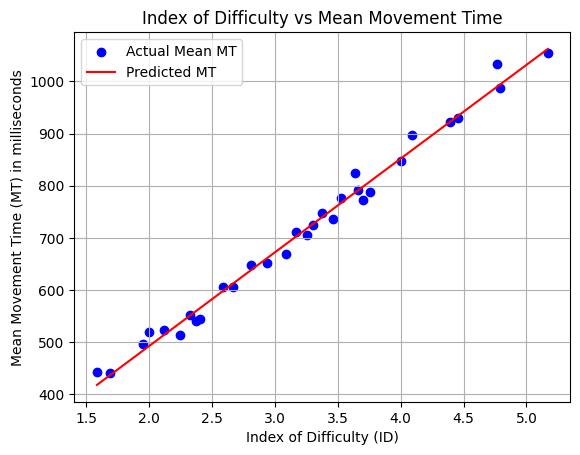

In [ ]:
FL['predicted_mt'] = model.predict(id_by_fitts)
grouped_FL = FL.groupby('index_of_difficulty').mean()
plt.scatter(grouped_FL.index, grouped_FL['movement_time'], color='blue', label='Actual Mean MT')
plt.plot(grouped_FL.index, grouped_FL['predicted_mt'], color='red', linestyle='-', label='Predicted MT')

plt.title('Index of Difficulty vs Mean Movement Time')
plt.xlabel('Index of Difficulty (ID)')
plt.ylabel('Mean Movement Time (MT) in milliseconds')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
R_squared = r2_score(movement_time, FL['predicted_mt'])
RMSE = np.sqrt(mean_squared_error(movement_time, FL['predicted_mt']))

print("R-squared:", R_squared)
print("RMSE:", RMSE)

R-squared: 0.4837657976317954
RMSE: 169.4197237189967


In [ ]:
FL_results = pd.DataFrame({
    'a': [a],
    'b': [b],
    'R_Squared': [R_squared],
    'RMSE': [RMSE]
})

FL_results.to_csv('results_FL.csv', index=True)

Part 2

In [ ]:
SL["index_of_difficulty"] = np.log2(SL["distance"] / SL["width"])

In [ ]:
id_by_fitts = SL['index_of_difficulty'].values.reshape(-1, 1)
movement_time = SL["movement_time"].values
model = LinearRegression();
model.fit(id_by_fitts, movement_time)
a = model.intercept_
b = model.coef_[0]

print("Intercept (a):", a)
print("Slope (b):", b)

Intercept (a): 236.35790717414017
Slope (b): 157.72387347765925


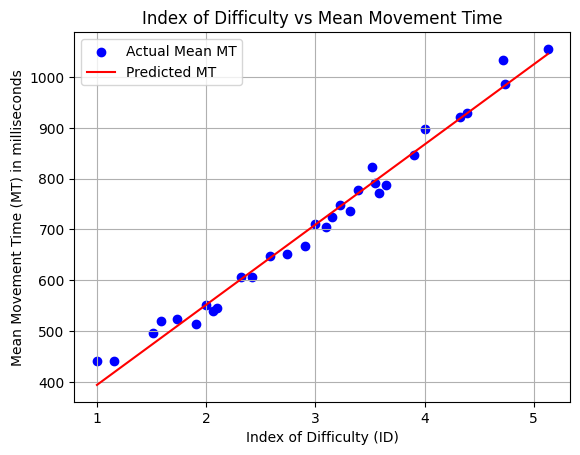

In [ ]:
SL['predicted_mt'] = model.predict(id_by_fitts)
grouped_SL = SL.groupby('index_of_difficulty').mean()
plt.scatter(grouped_SL.index, grouped_SL['movement_time'], color='blue', label='Actual Mean MT')
plt.plot(grouped_SL.index, grouped_SL['predicted_mt'], color='red', linestyle='-', label='Predicted MT')

plt.title('Index of Difficulty vs Mean Movement Time')
plt.xlabel('Index of Difficulty (ID)')
plt.ylabel('Mean Movement Time (MT) in milliseconds')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [ ]:
R_squared = r2_score(movement_time, SL['predicted_mt'])
RMSE = np.sqrt(mean_squared_error(movement_time, SL['predicted_mt']))

print("R-squared:", R_squared)
print("RMSE:", RMSE)

R-squared: 0.4811710581004057
RMSE: 169.8449658356176


In [ ]:
data = {
    'a': [a],
    'b': [b],
    'R_Squared': [R_squared],
    'RMSE': [RMSE]
}
SL_results = pd.DataFrame(data)

SL_results.to_csv('results_SL.csv', index=True)